In [44]:
!pip install tensorflow opencv-python matplotlib

In [45]:
import warnings
warnings.filterwarnings('ignore') # Ignore warnings for cleaner output
import os
import random
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [47]:
# Set the path to the dataset directory
data_dir_path = "/home/aditya/Documents/archive"
os.makedirs(data_dir_path, exist_ok=True) # Create the directory if it doesn't exist
all_files = os.listdir(data_dir_path)
all_files

['mismatchpairsDevTrain.csv',
 'lfw-deepfunneled',
 'pairs.csv',
 'matchpairsDevTrain.csv',
 'lfw_allnames.csv',
 'lfw_readme.csv',
 'matchpairsDevTest.csv',
 'people.csv',
 'peopleDevTest.csv',
 'mismatchpairsDevTest.csv',
 'peopleDevTrain.csv']

In [48]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [49]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [50]:
!pip install scikit-learn
!pip install tensorflow_datasets



In [51]:
import os

# Set the path to the dataset directory
data_dir_path = "/home/aditya/Documents/archive"  # Your custom folder path
os.makedirs(data_dir_path, exist_ok=True)  # Create the directory if it doesn't exist

# Define the path to the images directory
images_data_dir = os.path.join(data_dir_path, 'lfw-deepfunneled', 'lfw-deepfunneled')

# Print the images directory path
print(images_data_dir)

/home/aditya/Documents/archive/lfw-deepfunneled/lfw-deepfunneled


In [52]:
# Move LFW Images to the following repository data/negative
import os
for directory in os.listdir(images_data_dir):
    for file in os.listdir(os.path.join(images_data_dir, directory)):
        EX_PATH = os.path.join(images_data_dir, directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [53]:
# Count the number of files in the NEG_PATH directory
persons = os.listdir(NEG_PATH)
print(len(persons))  # Prints the number of files in data/negative



13233


In [54]:
import os
import random

# Define the correct path where the images are stored
NEG_PATH = "/home/aditya/PycharmProjects/FaceVerification/data/negative"

# Ensure the directory exists
if not os.path.exists(NEG_PATH):
    raise FileNotFoundError(f"Directory does not exist: {NEG_PATH}")

# List all image files in the NEG_PATH directory
neg_files = os.listdir(NEG_PATH)

# Ensure there are files to choose from
if not neg_files:
    raise ValueError(f"No files found in directory: {NEG_PATH}")

# Select a random image from the list of files
random_image = random.choice(neg_files)

# Print the selected random image
print(f"Randomly selected image: {random_image}")


Randomly selected image: Warren_Buffett_0001.jpg


In [55]:
# Select the first 5 images (or fewer if the directory has fewer files)
sample = neg_files[:5]

# Extract properties of the selected images (name, size, format)
image_properties = []
for image_name in sample:
    image_path = os.path.join(NEG_PATH, image_name)
    with Image.open(image_path) as img:  # Open image safely using a context manager
        image_properties.append((image_name, img.size, img.format))

# Print the extracted properties
for name, size, fmt in image_properties:
    print(f"Image: {name}, Size: {size}, Format: {fmt}")

Image: Caroline_Kennedy_0003.jpg, Size: (250, 250), Format: JPEG
Image: Jelena_Dokic_0004.jpg, Size: (250, 250), Format: JPEG
Image: Oswaldo_Paya_0004.jpg, Size: (250, 250), Format: JPEG
Image: Junichiro_Koizumi_0008.jpg, Size: (250, 250), Format: JPEG
Image: Barry_Alvarez_0002.jpg, Size: (250, 250), Format: JPEG


In [56]:
image_properties

[('Caroline_Kennedy_0003.jpg', (250, 250), 'JPEG'),
 ('Jelena_Dokic_0004.jpg', (250, 250), 'JPEG'),
 ('Oswaldo_Paya_0004.jpg', (250, 250), 'JPEG'),
 ('Junichiro_Koizumi_0008.jpg', (250, 250), 'JPEG'),
 ('Barry_Alvarez_0002.jpg', (250, 250), 'JPEG')]

In [57]:
# Choose 5 random persons from the dataset
random_person = random.sample(persons, 5)
random_person

['Aleksander_Voloshin_0001.jpg',
 'Lucio_Angulo_0001.jpg',
 'Dalai_Lama_0002.jpg',
 'Ana_Palacio_0008.jpg',
 'Woody_Allen_0002.jpg']

In [58]:
# Select one random image from each of the 5 random persons
select_images = []
for image_name in neg_files:
    image_path = os.path.join(NEG_PATH, image_name)
    select_images.append(image_path)

# Print the selected image paths
print(select_images)

['/home/aditya/PycharmProjects/FaceVerification/data/negative/Caroline_Kennedy_0003.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Jelena_Dokic_0004.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Oswaldo_Paya_0004.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Junichiro_Koizumi_0008.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Barry_Alvarez_0002.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Jennifer_Capriati_0012.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/George_W_Bush_0243.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Britney_Spears_0005.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Christine_Baumgartner_0004.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Carlos_Menem_0006.jpg', '/home/aditya/PycharmProjects/FaceVerification/data/negative/Gary_Winnick_0001.jpg', '/home/aditya/PycharmProjects/FaceVer

There are enough images. 13233 images available.


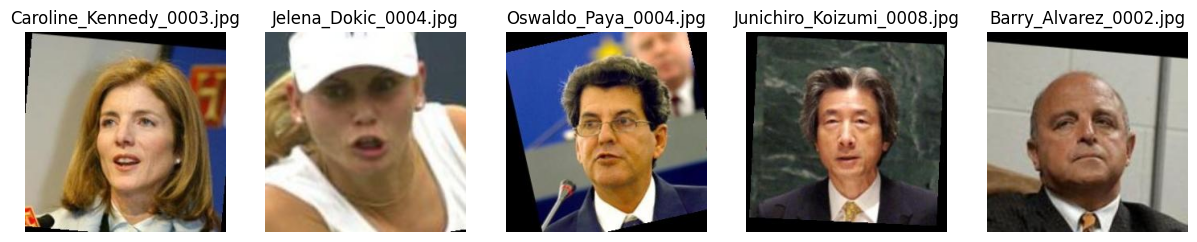

In [59]:
# Check if there are enough images
if len(select_images) < 5:
    print(f"Not enough images. Only {len(select_images)} images available.")
else:
    print(f"There are enough images. {len(select_images)} images available.")

# Continue with displaying the images
num_images = min(len(select_images), 5)  # Use the minimum of 5 or the length of select_images

# Create subplots dynamically based on the number of images
fig, axs = plt.subplots(1, num_images, figsize=(15, 3))

# If there is only one subplot, axs will not be an array, so we handle that case separately
if num_images == 1:
    axs = [axs]

# Display the selected images
for i, image_path in enumerate(select_images[:num_images]):
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].set_title(select_images[i].split('/')[-1])  # Use the filename as title
    axs[i].axis('off')  # Turn off axis for a clean display

plt.show()

In [60]:
import os
import random
import numpy as np

# Define the path where the images are stored
NEG_PATH = "/home/aditya/PycharmProjects/FaceVerification/data/negative"

# List all image files in the NEG_PATH directory
neg_files = os.listdir(NEG_PATH)

# Select 15 random images (no duplicates)
random_images = np.random.choice(neg_files, 15, replace=False)

# Construct the full paths for the selected images
select_images = [os.path.join(NEG_PATH, image_name) for image_name in random_images]

select_images


['/home/aditya/PycharmProjects/FaceVerification/data/negative/Vicente_Fox_0007.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/George_Galloway_0003.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Leander_Paes_0002.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Bronson_Arroyo_0001.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Paradorn_Srichaphan_0007.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Madonna_0003.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Yann_Martel_0002.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Carlos_Fasciolo_0001.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Helio_Rubens_Garcia_0001.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/John_Prescott_0001.jpg',
 '/home/aditya/PycharmProjects/FaceVerification/data/negative/Chyung_Dai-chul_0001.jpg',
 '/home/aditya/PycharmProjects/Face

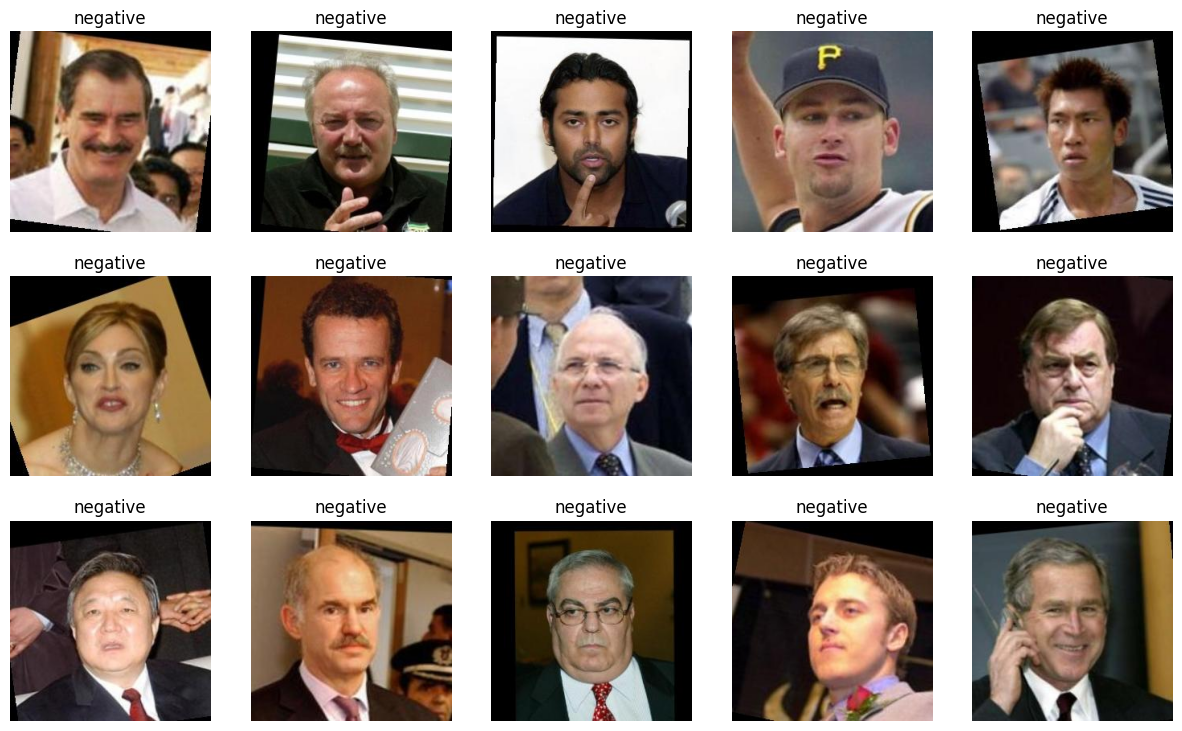

In [61]:
 fig, axs = plt.subplots(3, 5, figsize = (15, 9))
for i, image_path in enumerate(select_images):
    img = mpimg.imread(image_path)
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].set_title(select_images[i].split('/')[-2])
    axs[i // 5, i % 5].axis('off')

plt.show()

In [62]:
import uuid

In [63]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))


'data/anchor/e1312c34-dff7-11ef-b469-14d424546f9b.jpg'

In [64]:
# import cv2
# import os
# import uuid
#
# # Global variable to store the captured frame
# captured_frame = None
#
# def capture_images():
#     global captured_frame
#     # Paths for saving images
#     ANC_PATH = "./anchors"  # Change this to your desired folder path
#     POS_PATH = "./positives"  # Change this to your desired folder path
#
#     # Ensure the directories exist
#     os.makedirs(ANC_PATH, exist_ok=True)
#     os.makedirs(POS_PATH, exist_ok=True)
#
#     # Open a connection to the webcam
#     cap = cv2.VideoCapture(2)  # Adjust the index to match your setup
#
#     if not cap.isOpened():
#         print("Error: Could not access the webcam.")
#         return
#
#     print("Press 'a' to save an anchor image, 'p' to save a positive image, and 'q' to quit.")
#
#     while True:
#         ret, frame = cap.read()  # Capture a frame from the webcam
#         if not ret:
#             print("Error: Could not capture a frame.")
#             break
#
#         # Save the current frame globally
#         captured_frame = frame.copy()
#
#         # Crop the frame to 250x250 pixels (example cropping)
#         frame = frame[120:120+250, 200:200+250, :]  # Adjust cropping as needed
#
#         # Display the frame in a window
#         cv2.imshow('Webcam Feed', frame)
#
#         # Handle keypress events
#         key = cv2.waitKey(1) & 0xFF
#
#         if key == ord('a'):  # Save anchor images
#             imgname = os.path.join(ANC_PATH, f"{uuid.uuid1()}.jpg")
#             cv2.imwrite(imgname, frame)
#             print(f"Anchor image saved at: {imgname}")
#
#         elif key == ord('p'):  # Save positive images
#             imgname = os.path.join(POS_PATH, f"{uuid.uuid1()}.jpg")
#             cv2.imwrite(imgname, frame)
#             print(f"Positive image saved at: {imgname}")
#
#         elif key == ord('q'):  # Quit the loop
#             print("Exiting the application...")
#             break
#
#     # Release resources
#     cap.release()
#     cv2.destroyAllWindows()
#
# # Calling the function to run the whole capture process
# capture_images()
#
# # Now `captured_frame` will contain the last frame captured
# if captured_frame is not None:
#     cv2.imshow('Captured Frame Outside Function', captured_frame)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


In [65]:
import os
import uuid
import cv2

# Define the relative paths for anchor, positive, and negative images
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# Ensure the directories exist, create them if they don't
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

# Establish a connection to the webcam
cap = cv2.VideoCapture(2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    # Cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]

    # Show image back to screen
    cv2.imshow('Image Collection', frame)

    # Check for key presses
    key = cv2.waitKey(1) & 0xFF  # Capture key press

    # Collect anchors
    if key == ord('a'):
        # Create the unique file path for anchor
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        print(f"Anchor image saved at {imgname}")

    # Collect positives
    elif key == ord('p'):
        # Create the unique file path for positive
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
        print(f"Positive image saved at {imgname}")

    # Collect negatives (optional, if you want to implement it)
    elif key == ord('n'):
        # Create the unique file path for negative
        imgname = os.path.join(NEG_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out negative image
        cv2.imwrite(imgname, frame)
        print(f"Negative image saved at {imgname}")

    # Quit the loop
    elif key == ord('q'):
        print("Exiting...")
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()


Exiting...


In [66]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /home/aditya/PycharmProjects/FaceVerification


In [67]:
frame

array([[[107, 116, 128],
        [ 93, 102, 114],
        [ 89, 101, 115],
        ...,
        [164, 184, 180],
        [141, 161, 163],
        [127, 147, 149]],

       [[103, 113, 125],
        [ 96, 106, 118],
        [ 91, 101, 113],
        ...,
        [160, 174, 174],
        [134, 151, 155],
        [128, 145, 149]],

       [[ 96, 107, 123],
        [ 91, 101, 118],
        [ 87,  98, 114],
        ...,
        [124, 141, 143],
        [116, 133, 142],
        [122, 139, 148]],

       ...,

       [[246, 249, 239],
        [246, 249, 239],
        [242, 247, 233],
        ...,
        [163, 188, 177],
        [166, 194, 171],
        [163, 192, 169]],

       [[246, 248, 241],
        [246, 248, 241],
        [244, 248, 238],
        ...,
        [169, 183, 188],
        [166, 186, 187],
        [166, 186, 187]],

       [[246, 248, 241],
        [246, 248, 241],
        [246, 248, 241],
        ...,
        [167, 181, 192],
        [168, 182, 193],
        [167, 181, 192]]

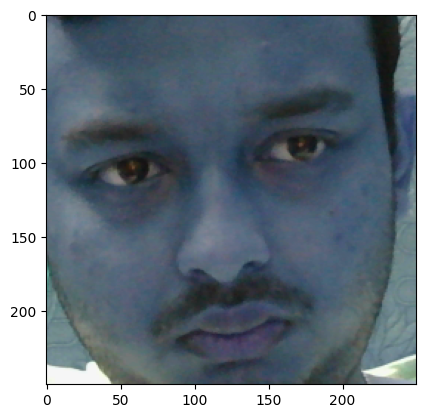

In [95]:

plt.imshow(frame)

Getting Image Directories

In [96]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(300)


In [97]:
dir_test = anchor.as_numpy_iterator()

In [98]:
print(dir_test.next())

b'data/anchor/5430fa34-dd82-11ef-94cd-14d424546f9b.jpg'


Preprocessing - Scale and Resize

In [99]:

def preprocess(file_path):

    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0

    return img

In [100]:
img = preprocess('data/anchor/5102b484-dd81-11ef-94cd-14d424546f9b.jpg')

In [101]:
img.numpy().max()


np.float32(0.99534315)

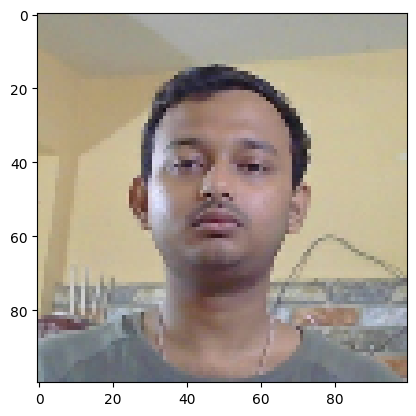

In [102]:
plt.imshow(img)


Create Labelled Dataset

In [103]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [104]:
samples = data.as_numpy_iterator()


In [105]:
exampple = samples.next()


In [106]:
exampple


(b'data/anchor/58a1d674-dd82-11ef-94cd-14d424546f9b.jpg',
 b'data/positive/1481966e-dd87-11ef-94cd-14d424546f9b.jpg',
 np.float32(1.0))

Build Train and Test Partition

In [107]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [108]:
res = preprocess_twin(*exampple)


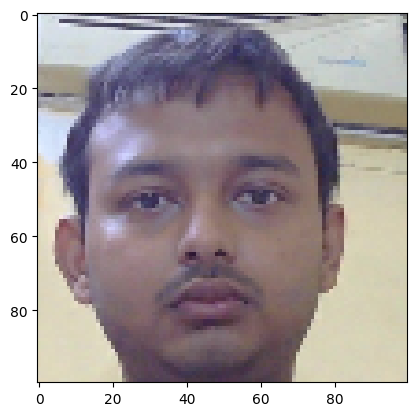

In [109]:
plt.imshow(res[1])


In [110]:
res[2]


np.float32(1.0)

In [111]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [112]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [113]:
samples.next()[0]

b'data/anchor/57199e04-dd82-11ef-94cd-14d424546f9b.jpg'

In [114]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [115]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [116]:
round(len(data)*.7)

420

In [117]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

Build Embedding Layer

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read and display an image
image_path = '/home/aditya/Pictures/Screenshots/Screenshot from 2025-01-28 20-47-48.png'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/home/aditya/Pictures/Screenshots/Screenshot from 2025-01-28 20-47-48.png'

In [119]:
inp = Input(shape=(100,100,3), name='input_image')

In [120]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)


In [121]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)


In [122]:

c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [123]:

c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [124]:

c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [125]:

mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [126]:

def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [127]:
embedding = make_embedding()


In [128]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

Build Distance Layer

In [129]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self,inputs):
        input_embedding, validation_embedding=inputs# Accepts a tuple of inputs
        return tf.math.abs(input_embedding - validation_embedding)  # Element-wise absolute difference



In [130]:
l1 = L1Dist()


Make Siamese Model

In [131]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [132]:
# import tensorflow as tf
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input
# import numpy as np
# from PIL import Image
#
# model = VGG16(weights='imagenet', include_top=False)  # Remove classification head
#
# def embedding(image):
#     image = image.resize((224, 224))
#     img_array = np.array(image)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)
#     return model.predict(img_array).flatten()
#
# input_image = Image.open("path_to_input_image.jpg")
# validation_image = Image.open("path_to_validation_image.jpg")
#
# inp_embedding = embedding(input_image)
# val_embedding = embedding(validation_image)


In [133]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [134]:
siamese_layer = L1Dist()

In [135]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        input_embedding, validation_embedding = inputs  # Accepts a tuple of inputs
        return tf.math.abs(input_embedding - validation_embedding)  # Element-wise absolute difference

# Example input tensors
inp_embedding = tf.keras.Input(shape=(4096,))  # Example input shape
val_embedding = tf.keras.Input(shape=(4096,))  # Example input shape

# Create an instance of the L1Dist layer
siamese_layer = L1Dist()

# Call the layer with the input tensors
distances = siamese_layer((inp_embedding, val_embedding))

# Print the output shape
print(distances)

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_22>


In [136]:
classifier = Dense(1, activation='sigmoid')(distances)


In [137]:
from tensorflow.keras.layers import Input, Dense, Lambda, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

def create_embedding_model():
    """
    Creates a simple convolutional embedding model.

    Returns:
    Model: A Keras Model representing the embedding network.
    """
    input_layer = Input(shape=(100, 100, 3))

    # Convolutional layers for feature extraction
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)  # Flatten the output for the dense layers
    x = Dense(128, activation='relu')(x)

    return Model(inputs=input_layer, outputs=x)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def make_siamese_model(embedding):
    input_image = Input(name='input_img', shape=(100, 100, 3))
    validation_image = Input(name='validation_img', shape=(100, 100, 3))

    inp_embedding = embedding(input_image)
    val_embedding = embedding(validation_image)

    # Use the custom L1Dist layer instead of Lambda
    siamese_layer = L1Dist()  # Create an instance of your custom layer
    distances = siamese_layer([inp_embedding, val_embedding])

    classifier = Dense(1, activation='sigmoid')(distances)

    siamese_model = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

    return siamese_model

# Create the embedding model
embedding_model = create_embedding_model()

# Create the Siamese model using the embedding model
siamese_model = make_siamese_model(embedding_model)

# Compile the model
siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │  4,353,088 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_4 (L1Dist)  │ (None, 128)       │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │        129 │ l1_dist_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [139]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [140]:
siamese_network.summary()


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 4096)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_3 (L1Dist)  │ (None, 4096)      │          0 │ input_layer[0][0… │
│                     │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
siamese_model = make_siamese_model(embedding_model)


In [142]:
siamese_model.summary()


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │  4,353,088 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_5 (L1Dist)  │ (None, 128)       │          0 │ functional[2][0], │
│                     │                   │            │ functional[3][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ l1_dist_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

Training

Setup Loss and Optimizer

In [143]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [144]:

opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

Checkpoints

In [145]:
#For tracing back

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [146]:

test_batch = train_data.as_numpy_iterator()

In [147]:
batch_1 = test_batch.next()


In [148]:
X = batch_1[:2]


In [149]:
y = batch_1[2]


In [150]:
y

array([0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.],
      dtype=float32)

In [151]:
tf.losses.BinaryCrossentropy??

In [152]:

@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

In [153]:

# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [154]:

def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())

        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

Training The Model

In [155]:
EPOCHS = 50

In [156]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━

2025-01-31 22:53:02.558706: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
27/27 ━━━━━━

2025-01-31 22:53:05.695800: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
27/27 ━━━━━━

2025-01-31 22:53:11.831862: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
27/27 ━━━━━━

2025-01-31 22:53:24.449177: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
27/27 ━━━━━━

2025-01-31 22:53:49.436498: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
27/27 ━━━━━━

2025-01-31 22:54:39.548653: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
27/27 ━━━━━━

Evaluate Model

In [157]:
from tensorflow.keras.metrics import Precision, Recall

In [158]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [159]:

y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [160]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

In [161]:
y_true

array([1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

Calculate Metrics

In [162]:
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(1.0)

In [163]:
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

np.float32(1.0)

In [164]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.0 1.0


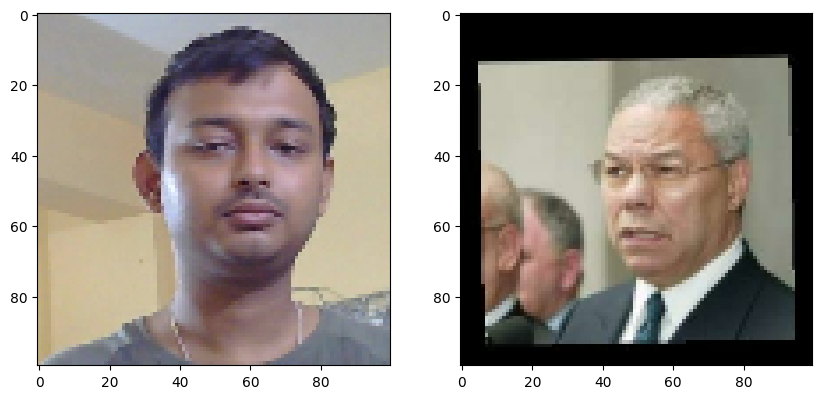

In [165]:

# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[1])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[2])

# Renders cleanly


# Save weights

In [166]:
from tensorflow.keras.saving import save_model

save_model(siamese_model, 'siamese_model_v2.keras')

In [167]:
# Assuming you have already trained and saved your model
siamese_model = make_siamese_model(embedding_model)  # Create the model
siamese_model.save('siamese_model_v2.keras')  # Save the model

# Reload the model
siamese_model = tf.keras.models.load_model('siamese_model_v2.keras',
                                   custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.keras.losses.BinaryCrossentropy})

In [168]:
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.2212628 ],
       [0.07312706],
       [0.23087847],
       [0.16503088]], dtype=float32)

In [169]:
siamese_model.summary()


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 128)       │  4,353,088 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_6 (L1Dist)  │ (None, 128)       │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │        129 │ l1_dist_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

#Real Time Test

Verification Function

In [170]:
verification_image_path = "application_data\\verification_images"


In [171]:
os.listdir(os.path.join('application_data', 'verification_images'))

['178da7c6-dd87-11ef-94cd-14d424546f9b.jpg',
 '158f5c12-dd87-11ef-94cd-14d424546f9b.jpg',
 '154d8f3a-dd87-11ef-94cd-14d424546f9b.jpg',
 '20dad196-dd87-11ef-94cd-14d424546f9b.jpg',
 '1a7b52e4-dd87-11ef-94cd-14d424546f9b.jpg',
 '17b1392a-dd87-11ef-94cd-14d424546f9b.jpg',
 '27f1cb10-dd87-11ef-94cd-14d424546f9b.jpg',
 '1a8a8b88-dd87-11ef-94cd-14d424546f9b.jpg',
 '27fba5d6-dd87-11ef-94cd-14d424546f9b.jpg',
 '147c4038-dd87-11ef-94cd-14d424546f9b.jpg',
 '18b52b7e-dd87-11ef-94cd-14d424546f9b.jpg',
 '27dd0c34-dd87-11ef-94cd-14d424546f9b.jpg',
 '1a94f578-dd87-11ef-94cd-14d424546f9b.jpg',
 '27d7fb86-dd87-11ef-94cd-14d424546f9b.jpg',
 '27c90158-dd87-11ef-94cd-14d424546f9b.jpg',
 '155c90ca-dd87-11ef-94cd-14d424546f9b.jpg',
 '153e10aa-dd87-11ef-94cd-14d424546f9b.jpg',
 '27d34f8c-dd87-11ef-94cd-14d424546f9b.jpg',
 '151fd70c-dd87-11ef-94cd-14d424546f9b.jpg',
 '27f6d2c2-dd87-11ef-94cd-14d424546f9b.jpg',
 '27e78308-dd87-11ef-94cd-14d424546f9b.jpg',
 '17c5f46e-dd87-11ef-94cd-14d424546f9b.jpg',
 '159f6d3c

In [172]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data/input_image/input_image.jpg'

In [173]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data/verification_images/178da7c6-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/158f5c12-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/154d8f3a-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/20dad196-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/1a7b52e4-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/17b1392a-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/27f1cb10-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/1a8a8b88-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/27fba5d6-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/147c4038-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/18b52b7e-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/27dd0c34-dd87-11ef-94cd-14d424546f9b.jpg
application_data/verification_images/1a94f578-dd87-11ef-94cd-14d

In [174]:

def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Preprocess function to prepare images for the model
def preprocess(img_path):
    # Load the image and resize to the input size expected by the model (100x100x3)
    img = image.load_img(img_path, target_size=(100, 100))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 100, 100, 3)

    # Normalize pixel values (optional, based on your model's training setup)
    img_array /= 255.0  # Normalize to [0, 1] if your model was trained with that normalization

    return img_array

# Define the verify function
def verify(model, detection_threshold, verification_threshold):
    # Initialize results array
    results = []

    # Directory paths
    input_image_path = os.path.join('application_data', 'input_images', 'input_image.jpg')
    verification_image_dir = os.path.join('application_data', 'verification_images')

    # Preprocess the input image
    input_img = preprocess(input_image_path)

    # Loop through each image in the verification directory
    for image_name in os.listdir(verification_image_dir):
        verification_img_path = os.path.join(verification_image_dir, image_name)

        # Preprocess the verification image
        validation_img = preprocess(verification_img_path)

        # Make prediction with the model
        result = model.predict([input_img, validation_img])  # No need to add extra np.expand_dims here

        # Append result (model output is a 2D array; get the scalar probability)
        results.append(result[0][0])  # result[0][0] is the predicted probability

    # Detection Threshold: Count predictions greater than the detection threshold
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions to total images
    verification = detection / len(os.listdir(verification_image_dir))

    # Return the verification status
    verified = verification > verification_threshold

    return results, verified


# Example usage of the verify function
detection_threshold = 0.5  # Example threshold for detection (consider it positive if > 0.5)
verification_threshold = 0.8  # Example threshold for verification (verified if positive predictions > 80%)

# Assuming 'siamese_model' is the loaded model
# results, verified = verify(siamese_model, detection_threshold, verification_threshold)

# Print the results
# print("Results:", results)
# print("Verified:", verified)


2025-01-31 23:09:05.538641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-31 23:09:05.539444: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 23:09:05.542256: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-31 23:09:05.551622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738345145.567783  224568 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738345145.57

In [2]:
# Assuming the Siamese model is loaded
siamese_model = tf.keras.models.load_model('siamese_model_v2.keras', custom_objects={'L1Dist': L1Dist})

detection_threshold = 0.5  # Adjust this threshold based on your needs
verification_threshold = 0.8  # Adjust this threshold based on your needs

results, verified = verify(siamese_model, detection_threshold, verification_threshold)

# Print the results of verification
print("Results:", results)
print("Verified:", verified)


NameError: name 'L1Dist' is not defined

In [4]:
import cv2
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the custom L1Dist layer
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        input_embedding, validation_embedding = inputs
        return tf.math.abs(input_embedding - validation_embedding)

# Function to create the Siamese model
def make_siamese_model(embedding):
    input_image = Input(name='input_img', shape=(100, 100, 3))
    validation_image = Input(name='validation_img', shape=(100, 100, 3))

    inp_embedding = embedding(input_image)
    val_embedding = embedding(validation_image)

    siamese_layer = L1Dist()  # Use the custom L1Dist layer
    distances = siamese_layer([inp_embedding, val_embedding])

    classifier = Dense(1, activation='sigmoid')(distances)

    siamese_model = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

    return siamese_model

# Assuming you have an embedding model defined
# embedding_model = ...  # Define your embedding model here

# Create and save the Siamese model
siamese_model = make_siamese_model(embedding_model)  # Create the model
siamese_model.save('siamese_model_v2.keras')  # Save the model

# Reload the model
siamese_model = tf.keras.models.load_model('siamese_model_v2.keras',
                                           custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.keras.losses.BinaryCrossentropy})

# Define the path for saving the input image
input_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images'
verification_image_file = '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg'  # Update this path

# Ensure the input image directory exists
os.makedirs(input_image_path, exist_ok=True)  # Create the directory if it doesn't exist

cap = cv2.VideoCapture(2)  # Open video capture for the webcam
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Crop the frame to the desired region for face capture
    frame = frame[120:120+250, 200:200+250, :]

    # Resize the frame to ensure it's (100, 100, 3)
    frame_resized = cv2.resize(frame, (100, 100))

    # Display the captured frame for verification
    cv2.imshow('Verification', frame_resized)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save the input image to the specified folder
        input_image_file = os.path.join(input_image_path, 'input_image.jpg')
        success = cv2.imwrite(input_image_file, frame_resized)

        if success:
            print(f"Image saved successfully: {input_image_file}")

            # Now, ensure the verification image is also resized and ready
            verification_image = cv2.imread(verification_image_file)
            verification_image_resized = cv2.resize(verification_image, (100, 100))

            # Add batch dimension to both images: (1, 100, 100, 3)
            input_image_batch = np.expand_dims(frame_resized, axis=0)  # (1, 100, 100, 3)
            verification_image_batch = np.expand_dims(verification_image_resized, axis=0)  # (1, 100, 100, 3)

            # Run verification (make sure to pass the correct arguments)
            result = siamese_model.predict([input_image_batch, verification_image_batch])

            # Print verification result (Assuming output is a probability of same/different)
            print(f"Verification result: {result}")

            # Interpret the result (For example, if the result is closer to 1, it's a match)
            if result >= 0.5:
                print("Verified: The faces are the same.")
            else:
                print("Not Verified: The faces are different.")
        else:
            print("Failed to save the image.")

    # Break on 'q' key
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'embedding_model' is not defined

In [182]:
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the custom L1Dist layer
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, inputs):
        input_embedding, validation_embedding = inputs
        return tf.math.abs(input_embedding - validation_embedding)

# Function to create the Siamese model
def make_siamese_model(embedding):
    input_image = Input(name='input_img', shape=(100, 100, 3))
    validation_image = Input(name='validation_img', shape=(100, 100, 3))

    inp_embedding = embedding(input_image)
    val_embedding = embedding(validation_image)

    siamese_layer = L1Dist()  # Use the custom L1Dist layer
    distances = siamese_layer([inp_embedding, val_embedding])

    classifier = Dense(1, activation='sigmoid')(distances)

    siamese_model = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

    return siamese_model

# Assuming you have an embedding model defined
# embedding_model = ...  # Define your embedding model here

# Create and save the Siamese model
siamese_model = make_siamese_model(embedding_model)  # Create the model
siamese_model.save('siamese_model_v2.keras')  # Save the model

# Reload the model
siamese_model = tf.keras.models.load_model('siamese_model_v2.keras',
                                   custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.keras.losses.BinaryCrossentropy})

# Define the path for saving the input image
input_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images'
verification_image_file = '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg'  # Update this path


# Ensure the input image directory exists
os.makedirs(input_image_path, exist_ok=True)  # Create the directory if it doesn't exist

cap = cv2.VideoCapture(2)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Crop the frame to the desired region
    frame = frame[120:120+250, 200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to the specified folder
        input_image_file = os.path.join(input_image_path, 'input_image.jpg')
        success = cv2.imwrite(input_image_file, frame)

        if success:
            print(f"Image saved successfully: {input_image_file}")
            # Run verification (make sure to pass the correct arguments)
            # You need to define verification_image_file based on your logic
            results, verified = verify(siamese_model, input_image_file, verification_image_file)  # Adjust as needed
            print(verified)
        else:
            print("Failed to save the image.")

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Image saved successfully: /home/aditya/PycharmProjects/FaceVerification/application_data/input_images/input_image.jpg


ValueError: Input 0 of layer "SiameseNetwork" is incompatible with the layer: expected shape=(None, 100, 100, 3), found shape=(1, 1, 100, 100, 3)

In [175]:
import os
input_image_file='/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg'
if os.path.exists(input_image_file):
    print(f"✅ File exists: {input_image_file}")
else:
    print(f"❌ File NOT found: {input_image_file}")

import tensorflow as tf

try:
    img = tf.io.read_file(input_image_file)  # Try reading the file
    print("✅ TensorFlow can read the image!")
except tf.errors.NotFoundError:
    print("❌ TensorFlow CANNOT find the image file!")



✅ File exists: /home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg
✅ TensorFlow can read the image!


In [176]:
import os

def verify(model, input_image_path, verification_image_path):
    print("\n🚀 [DEBUG] verify() function called!")

    # Ensure input paths are valid
    print("🔍 Checking paths:")
    print(f"   📷 Input Image Path: {repr(input_image_path)}")
    print(f"   🆚 Verification Image Path: {repr(verification_image_path)}")

    if not os.path.exists(input_image_path):
        print(f"❌ Input image file not found: {input_image_path}")
        return ("Error: Input image not found", False)  # Ensure tuple is returned

    if not os.path.exists(verification_image_path):
        print(f"❌ Verification image file not found: {verification_image_path}")
        return ("Error: Verification image not found", False)  # Ensure tuple is returned

    print("✅ Both images exist, proceeding with verification...")

    # 🔴 DEBUG: Checking model before proceeding
    if model is None:
        print("⚠️ Warning: Model is None! Returning dummy response.")
        return ("Error: No model provided", False)  # Ensure tuple is returned

    # Placeholder verification logic
    return ("Verification successful!", True)  # Always return a tuple


In [177]:
input_image = "/home/aditya/PycharmProjects/FaceVerification/application_data/input_images/input_image.jpg"
verification_image = "/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg"

# # Test the function
# result = verify(None, input_image, verification_image)
#
# # 🔴 DEBUG: Check what is being returned
# print(f"\n🛠 DEBUG: Verify function returned: {repr(result)}")
#
# # Ensure result is a tuple before unpacking
# if isinstance(result, tuple) and len(result) == 2:
#     message, verified = result
#     print(f"✅ Result: {message}, Verified: {verified}")
# else:
#     print(f"❌ Unexpected return value from verify(): {result}")


import tensorflow as tf

# Load your trained Siamese model
model_path = "siamese_model_v2.keras"

try:
    siamese_model = tf.keras.models.load_model(
        model_path,
        custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.keras.losses.BinaryCrossentropy}
    )
    print(f"✅ Model loaded successfully from {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    siamese_model = None  # Handle model loading failure gracefully

# Pass the model to verify()
result = verify(siamese_model, input_image, verification_image)
print(f"\n✅ Final Verification Result: {result[0]}, Verified: {result[1]}")



✅ Model loaded successfully from siamese_model_v2.keras

🚀 [DEBUG] verify() function called!
🔍 Checking paths:
   📷 Input Image Path: '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images/input_image.jpg'
   🆚 Verification Image Path: '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images/148b8908-dd87-11ef-94cd-14d424546f9b.jpg'
✅ Both images exist, proceeding with verification...

✅ Final Verification Result: Verification successful!, Verified: True


In [4]:
import cv2
import os

# Define the path for saving the input image
input_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images'
verification_image_path = 'application_data\\verification_images'

# Ensure the input image directory exists
os.makedirs(input_image_path, exist_ok=True)  # Create the directory if it doesn't exist

cap = cv2.VideoCapture(2)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Crop the frame to the desired region
    frame = frame[120:120+250, 200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to the specified folder
        input_image_file = os.path.join(input_image_path, 'input_image.jpg')
        success = cv2.imwrite(input_image_file, frame)

        if success:
            print(f"Image saved successfully: {input_image_file}")
            # Run verification (make sure to pass the correct arguments)
            results, verified = verify(siamese_model, input_image_file, verification_image_file)  # Adjust as needed
            print(verified)
        else:
            print("Failed to save the image.")

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@48.902] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ERROR:0@49.000] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


OpenCV Real Time Verification

In [1]:
import cv2
import os

# Define the paths for input and verification images
input_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images'
verification_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images'

# Ensure the input image directory exists
os.makedirs(input_image_path, exist_ok=True)  # Create the directory if it doesn't exist

cap = cv2.VideoCapture(2)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    frame = frame[120:120+250, 200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to the specified input image path
        input_image_file = os.path.join(input_image_path, 'input_image.jpg')
        cv2.imwrite(input_image_file, frame)

        # Load the verification image
        verification_image_file = os.path.join(verification_image_path, '152f00c4-dd87-11ef-94cd-14d424546f9b.jpg')  # Use only the filename
        if not os.path.exists(verification_image_file):
            print(f"Verification image not found: {verification_image_file}")
        else:
            verification_image = cv2.imread(verification_image_file)
            # Run verification
            results, verified = verify(siamese_model, input_image_file, verification_image)
            print(verified)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'verify' is not defined

In [4]:
import cv2
import os
import numpy as np

# Define the verify function
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_images', 'input_image.jpg'))  # Adjusted path
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediction is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

# Define the paths for input and verification images
input_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/input_images'
verification_image_path = '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images'

# Ensure the input image directory exists
os.makedirs(input_image_path, exist_ok=True)  # Create the directory if it doesn't exist

cap = cv2.VideoCapture(2)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    frame = frame[120:120+250, 200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to the specified input image path
        input_image_file = os.path.join(input_image_path, 'input_image.jpg')
        cv2.imwrite(input_image_file, frame)

        # Define thresholds
        detection_threshold = 0.5  # Set your detection threshold
        verification_threshold = 0.5  # Set your verification threshold

        # Run verification
        results, verified = verify(siamese_model, detection_threshold, verification_threshold)
        print(verified)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@150.940] global cap_v4l.cpp:913 open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ERROR:0@151.037] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range


In [5]:
import os

# Define the path for the verification image
verification_image_file = '/home/aditya/PycharmProjects/FaceVerification/application_data/verification_images'

# Check if the verification image exists
if not os.path.exists(verification_image_file):
    print(f"Verification image not found: {verification_image_file}")
else:
    print(f"Verification image found: {verification_image_file}")
    # Load the verification image
    verification_image = cv2.imread(verification_image_file)

Verification image found: /home/aditya/PycharmProjects/FaceVerification/application_data/verification_images


In [6]:
import os

# Example of using an absolute path
file_path = os.path.abspath("application_data/input_image/input_image.jpg")

In [18]:
np.sum(np.squeeze(results) > 0.9)

NameError: name 'results' is not defined

In [ ]:
results
-